# Library Import

In [1]:
import warnings       # Library to supress warning
warnings.filterwarnings("ignore") 
import numpy as np   # library for data analysis and linear algebra
import pandas as pd    # library for data reading and analysis
import matplotlib.pyplot as plt     # Library for data visualiation
import seaborn as sns     # Library for data visualiation

# Function to Read Data and Return 2 Dataframes

In [2]:
%%capture
def dt_load(df):    # method to load data
    dt=open(df,"r+").read()      # read data 
    dt=dt[85:]     # set data after 85 data points to avoid blanks
    data=open("temp.csv","w+").write(dt)     # store data in CSV format
    data=pd.read_csv("temp.csv",error_bad_lines=False)    # read the saved data
    data=data.fillna(data.mean())    # filling the null values using average of the data (mean())
    return data     # return data

In [3]:
def dt_prep(dr_dt):     # methdi to prepare data
    metendt=dt_load(dr_dt)       # calling fucntion to read data
    yrcols=metendt.columns.tolist()[4:-1]     # take yaers from the data
    
    # subset the data using selecetd indicators => Methane emissions, Energy use
    metendt=metendt[(metendt['Indicator Name']=="Methane emissions (kt of CO2 equivalent)")|((metendt['Indicator Name']=="Energy use (kg of oil equivalent per capita)"))]
    global all_cntr
    # selwcetd countries on whcih analysis will e done based on indicators
    all_cntr=["Bangladesh", "United Kingdom", "Germany", "Argentina", "Brazil", "India", "Australia", "Iraq", "Bhutan"]
    fltr_dt=metendt['Country Name'].isin(all_cntr)    # take all records of countries from the actual data
    metendt=metendt[fltr_dt]     # filter the data
    ntns, ind=metendt['Country Name'].tolist(), metendt['Indicator Name'].tolist()    # take country names ane indicator codes into list
    coltodrop=['Unnamed: 65','Country Code','Indicator Code']
    dfcom=[]
    for i in range(len(ind)):
        dfcom.append(ntns[i]+"-"+ind[i])     # store all data (concerbing indicators) in a list
    metendt.insert(4,"Country with Indicator",dfcom)
    metendt1=metendt.T.iloc[4:][:-1]     # transpose data
    metendt=metendt.drop("Country with Indicator",axis=1)    # remove the column
    metendt1.columns=metendt1.iloc[0]     # take row names from 0th Row
    metendt1=metendt1.iloc[1:]     # prepare data from 1st row
    metendt1['Year']=yrcols     # set year into data
    metendt1=metendt1.set_index("Year")     # set year as index to make the data compatible to time series analysis
    metendt=metendt.reset_index(drop=True).drop(coltodrop,axis=1)
    return metendt,metendt1  

In [4]:
%%capture
df,df1=dt_prep("Energy_and_Methene_World_Bank.csv")

In [5]:
df.head()   # First Data with Year Column

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,Methane emissions (kt of CO2 equivalent),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,109130.000000,111740.000000,113350.000000,114180.000000,1.140900e+05,1.155800e+05,1.175700e+05,1.178500e+05,3.435867e+07,4.320922e+07
1,Argentina,Energy use (kg of oil equivalent per capita),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,1952.051053,1936.803540,1967.021678,2029.922825,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
2,Australia,Methane emissions (kt of CO2 equivalent),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,168820.000000,166730.000000,127150.000000,135190.000000,1.334300e+05,1.182800e+05,1.398100e+05,1.390700e+05,3.435867e+07,4.320922e+07
3,Australia,Energy use (kg of oil equivalent per capita),3.063554e+03,3.115787e+03,3.172975e+03,3.284051e+03,3.349414e+03,3.463216e+03,3.546538e+03,3.692808e+03,...,5745.232190,5575.287093,5468.391369,5334.681679,5.483816e+03,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
4,Bangladesh,Methane emissions (kt of CO2 equivalent),2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,79160.000000,79550.000000,79980.000000,80550.000000,8.090000e+04,8.024000e+04,8.259000e+04,8.379000e+04,3.435867e+07,4.320922e+07


In [6]:
df1.head()   # second data with country column

Country with Indicator,Argentina-Methane emissions (kt of CO2 equivalent),Argentina-Energy use (kg of oil equivalent per capita),Australia-Methane emissions (kt of CO2 equivalent),Australia-Energy use (kg of oil equivalent per capita),Bangladesh-Methane emissions (kt of CO2 equivalent),Bangladesh-Energy use (kg of oil equivalent per capita),Brazil-Methane emissions (kt of CO2 equivalent),Brazil-Energy use (kg of oil equivalent per capita),Bhutan-Methane emissions (kt of CO2 equivalent),Bhutan-Energy use (kg of oil equivalent per capita),Germany-Methane emissions (kt of CO2 equivalent),Germany-Energy use (kg of oil equivalent per capita),United Kingdom-Methane emissions (kt of CO2 equivalent),United Kingdom-Energy use (kg of oil equivalent per capita),India-Methane emissions (kt of CO2 equivalent),India-Energy use (kg of oil equivalent per capita),Iraq-Methane emissions (kt of CO2 equivalent),Iraq-Energy use (kg of oil equivalent per capita)
Year,,,,,,,,,,,,,,,,,,
1960,20159401.163406,20159401.163406,20159401.163406,3063.554271,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406,1952.588632,20159401.163406,3033.050649,20159401.163406,20159401.163406,20159401.163406,20159401.163406
1961,14768896.898304,14768896.898304,14768896.898304,3115.787084,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304,1994.324633,14768896.898304,3006.747386,14768896.898304,14768896.898304,14768896.898304,14768896.898304
1962,14888963.885678,14888963.885678,14888963.885678,3172.974865,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678,2124.848539,14888963.885678,3087.341972,14888963.885678,14888963.885678,14888963.885678,14888963.885678
1963,16420743.87221,16420743.87221,16420743.87221,3284.050959,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221,2281.289928,16420743.87221,3196.831184,16420743.87221,16420743.87221,16420743.87221,16420743.87221
1964,16886643.335033,16886643.335033,16886643.335033,3349.414167,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033,2341.146313,16886643.335033,3212.534556,16886643.335033,16886643.335033,16886643.335033,16886643.335033


In [7]:
df.describe().T    # data statsitics

,count,mean,std,min,25%,50%,75%,max
1960,18.0,1.679995e+07,7.729749e+06,1.952589e+03,2.015940e+07,2.015940e+07,2.015940e+07,2.015940e+07
1961,18.0,1.230787e+07,5.662576e+06,1.994325e+03,1.476890e+07,1.476890e+07,1.476890e+07,1.476890e+07
1962,18.0,1.240794e+07,5.708585e+06,2.124849e+03,1.488896e+07,1.488896e+07,1.488896e+07,1.488896e+07
1963,18.0,1.368444e+07,6.295948e+06,2.281290e+03,1.642074e+07,1.642074e+07,1.642074e+07,1.642074e+07
1964,18.0,1.407270e+07,6.474594e+06,2.341146e+03,1.688664e+07,1.688664e+07,1.688664e+07,1.688664e+07
...,...,...,...,...,...,...,...,...
2016,18.0,6.846615e+06,6.872918e+06,8.700000e+02,8.907500e+04,7.090967e+06,1.352424e+07,1.352424e+07
2017,18.0,7.855384e+06,7.907739e+06,8.700000e+02,9.133500e+04,8.100252e+06,1.553889e+07,1.553889e+07
2018,18.0,8.633089e+06,8.707997e+06,8.600000e+02,9.230500e+04,8.880472e+06,1.709443e+07,1.709443e+07
2019,18.0,3.435867e+07,1.533317e-08,3.435867e+07,3.435867e+07,3.435867e+07,3.435867e+07,3.435867e+07


In [8]:
df1.describe().T       # data statsitics

,count,unique,top,freq
Country with Indicator,,,,
Argentina-Methane emissions (kt of CO2 equivalent),61.0,61.0,1.476890e+07,1.0
Argentina-Energy use (kg of oil equivalent per capita),61.0,61.0,1.476890e+07,1.0
Australia-Methane emissions (kt of CO2 equivalent),61.0,61.0,1.476890e+07,1.0
Australia-Energy use (kg of oil equivalent per capita),61.0,61.0,4.320922e+07,1.0
Bangladesh-Methane emissions (kt of CO2 equivalent),61.0,61.0,1.476890e+07,1.0
Bangladesh-Energy use (kg of oil equivalent per capita),61.0,61.0,1.476890e+07,1.0
Brazil-Methane emissions (kt of CO2 equivalent),61.0,61.0,1.476890e+07,1.0
Brazil-Energy use (kg of oil equivalent per capita),61.0,61.0,1.476890e+07,1.0
Bhutan-Methane emissions (kt of CO2 equivalent),61.0,43.0,9.000000e+02,5.0


# Data Analysis

In [9]:
def time_ser(dt,tl):     # method for time series analysis
    dt.plot(kind='line',figsize=(8,3))    # plotting using the data frame
    plt.title("{}".format(tl),fontsize=20,color="b")   # plotting title
    plt.xlabel("Value",fontsize=20,color="b")    # naming x label of the plot
    plt.ylabel("Year",fontsize=20,color="b")    # naming y label of the plot
    plt.grid()     # plot grid
    plt.show()     # plot show

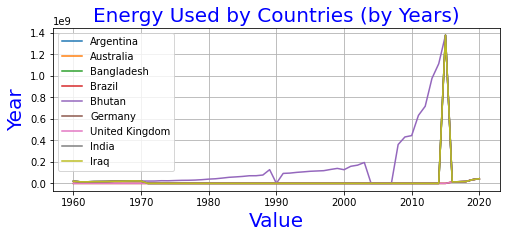

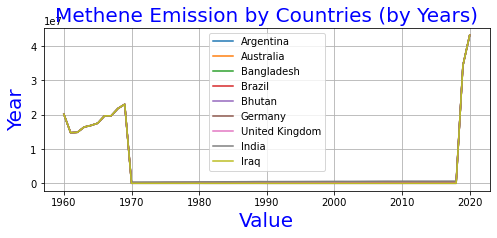

In [10]:
df1_1=df1.copy()
clmns=df1.columns.tolist()   # take column into list
c1,c2=[],[]
for c in range(len(clmns)):
    if c%2!=0:
        c1.append(clmns[c])    # take column with even indices (columns for methene emisstion)
    else:
        c2.append(clmns[c])    # take column with even indices (columns for energy usage)
df1_1m=df1_1[c1]    # subset data with  methene emisstion columns
df1_1e=df1_1[c2]   # subset data with energy usage columns
for x in range(len(c1)): 
    c1[x]=c1[x].split("-")[0]    # prepare column names for visualization through remiving "_" from column names
for x in range(len(c2)):
    c2[x]=c2[x].split("-")[0]    # prepare column names for visualization through remiving "_" from column names
df1_1m.columns=c1
df1_1e.columns=c2
time_ser(df1_1m,"Energy Used by Countries (by Years)")
time_ser(df1_1e,"Methene Emission by Countries (by Years)")

In [11]:
met,ener=[],[]
print("===========================================================")
for i in range(len(all_cntr)):
    dft=df[df['Country Name']==all_cntr[i]]    # subset data by country names
    dft=dft.drop('Indicator Name',axis=1) 
    print("                       {}".format(all_cntr[i]))
    print("===========================================================")
    print("\tMethane emissions by {} is {}".format(all_cntr[i],round(dft.iloc[0,1:].mean(),2)))   # display average values of Methane emission
    print("\tEnergy use by {} is {}".format(all_cntr[i],round(dft.iloc[1,1:].mean(),2)))   # display average values of Energy use
    print("===========================================================")
    met.append(round(dft.iloc[0,1:].mean(),2))
    ener.append(round(dft.iloc[1,1:].mean(),2))

                       Bangladesh
	Methane emissions by Bangladesh is 4366454.05
	Energy use by Bangladesh is 27977293.47
                       United Kingdom
	Methane emissions by United Kingdom is 4385873.73
	Energy use by United Kingdom is 2031496.73
                       Germany
	Methane emissions by Germany is 4383120.37
	Energy use by Germany is 2031826.97
                       Argentina
	Methane emissions by Argentina is 4387464.93
	Energy use by Argentina is 27978339.72
                       Brazil
	Methane emissions by Brazil is 4559674.73
	Energy use by Brazil is 27977942.93
                       India
	Methane emissions by India is 4738433.55
	Energy use by India is 27977472.15
                       Australia
	Methane emissions by Australia is 4406468.5
	Energy use by Australia is 2032668.54
                       Iraq
	Methane emissions by Iraq is 4316211.26
	Energy use by Iraq is 27977938.4
                       Bhutan
	Methane emissions by Bhutan is 4303679.08
	Ene

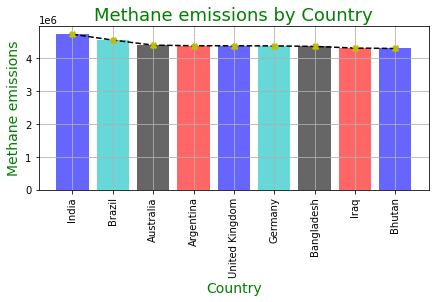

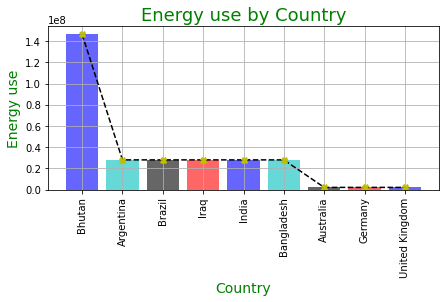

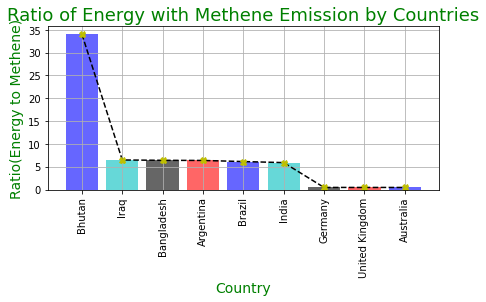

,Methane emissions,Energy use,Ratio(Energy to Methene)
Country,,,
Bhutan,4303679.08,1.464726e+08,34.034275
Iraq,4316211.26,2.797794e+07,6.482060
Bangladesh,4366454.05,2.797729e+07,6.407326
Germany,4383120.37,2.031827e+06,0.463557
United Kingdom,4385873.73,2.031497e+06,0.463191
Argentina,4387464.93,2.797834e+07,6.376881
Australia,4406468.50,2.032669e+06,0.461292
Brazil,4559674.73,2.797794e+07,6.135951
India,4738433.55,2.797747e+07,5.904372


In [12]:
def val_by_cntr(dt,cl,tl):
    plt.figure(figsize=(7,3))
    plt.title("{}".format(tl),fontsize=18,color="g")   # plotting title
    plt.bar(dt.index,dt['{}'.format(cl)],color=["b","c","k","r"],alpha=0.6)    # bar chart with colour depth 60%
    plt.plot(dt['{}'.format(cl)],"k--")    # line chart with two different plot style
    plt.plot(dt['{}'.format(cl)],"Xy")    # line chart with two different plot style
    plt.xlabel("Country",fontsize=14,color="g")    # naming x label of the plot
    plt.ylabel("{}".format(cl),fontsize=14,color="g")    # naming y label of the plot
    plt.xticks(rotation=90)    # rotate the x axis for better label visualiation
    plt.grid()     # plot grid
    plt.show()     # plot show

# create dataframe with Methane emissions values (average) and Energy use values (average)
cntr_sts=pd.DataFrame({"Country":all_cntr,"Methane emissions":met,"Energy use":ener})
rat=cntr_sts["Energy use"]/cntr_sts["Methane emissions"]    # calculate ratio of Methane emissions and Energy use
cntr_sts['Ratio(Energy to Methene)']=rat
st1=cntr_sts.copy()
cntr_sts=cntr_sts.set_index("Country")
cntr_sts=cntr_sts.sort_values(by="Methane emissions")
ftnm=['Methane emissions by Country','Energy use by Country','Ratio of Energy with Methene Emission by Countries']
for clm in range(len(cntr_sts.columns)):
    df=cntr_sts.sort_values(by=cntr_sts.columns[clm],ascending=False)
    val_by_cntr(df,cntr_sts.columns[clm],ftnm[clm])
cntr_sts

In [13]:
cntr_sts.sort_values(by="Methane emissions",ascending=False)

,Methane emissions,Energy use,Ratio(Energy to Methene)
Country,,,
India,4738433.55,2.797747e+07,5.904372
Brazil,4559674.73,2.797794e+07,6.135951
Australia,4406468.50,2.032669e+06,0.461292
Argentina,4387464.93,2.797834e+07,6.376881
United Kingdom,4385873.73,2.031497e+06,0.463191
Germany,4383120.37,2.031827e+06,0.463557
Bangladesh,4366454.05,2.797729e+07,6.407326
Iraq,4316211.26,2.797794e+07,6.482060
Bhutan,4303679.08,1.464726e+08,34.034275


In [14]:
cntr_sts.sort_values(by="Energy use",ascending=False)

,Methane emissions,Energy use,Ratio(Energy to Methene)
Country,,,
Bhutan,4303679.08,1.464726e+08,34.034275
Argentina,4387464.93,2.797834e+07,6.376881
Brazil,4559674.73,2.797794e+07,6.135951
Iraq,4316211.26,2.797794e+07,6.482060
India,4738433.55,2.797747e+07,5.904372
Bangladesh,4366454.05,2.797729e+07,6.407326
Australia,4406468.50,2.032669e+06,0.461292
Germany,4383120.37,2.031827e+06,0.463557
United Kingdom,4385873.73,2.031497e+06,0.463191


In [15]:
cntr_sts.sort_values(by="Ratio(Energy to Methene)",ascending=False)

,Methane emissions,Energy use,Ratio(Energy to Methene)
Country,,,
Bhutan,4303679.08,1.464726e+08,34.034275
Iraq,4316211.26,2.797794e+07,6.482060
Bangladesh,4366454.05,2.797729e+07,6.407326
Argentina,4387464.93,2.797834e+07,6.376881
Brazil,4559674.73,2.797794e+07,6.135951
India,4738433.55,2.797747e+07,5.904372
Germany,4383120.37,2.031827e+06,0.463557
United Kingdom,4385873.73,2.031497e+06,0.463191
Australia,4406468.50,2.032669e+06,0.461292


In [16]:
dtcl=df1.columns
dtid=df1.index
dt_vls=np.array(df1.values,float)    # convert to float
df1=pd.DataFrame(dt_vls,columns=dtcl,index=dtid)    # pepare data by converting the values to numerical (float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1960 to 2020
Data columns (total 18 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Argentina-Methane emissions (kt of CO2 equivalent)           61 non-null     float64
 1   Argentina-Energy use (kg of oil equivalent per capita)       61 non-null     float64
 2   Australia-Methane emissions (kt of CO2 equivalent)           61 non-null     float64
 3   Australia-Energy use (kg of oil equivalent per capita)       61 non-null     float64
 4   Bangladesh-Methane emissions (kt of CO2 equivalent)          61 non-null     float64
 5   Bangladesh-Energy use (kg of oil equivalent per capita)      61 non-null     float64
 6   Brazil-Methane emissions (kt of CO2 equivalent)              61 non-null     float64
 7   Brazil-Energy use (kg of oil equivalent per capita)          61 non-null     float

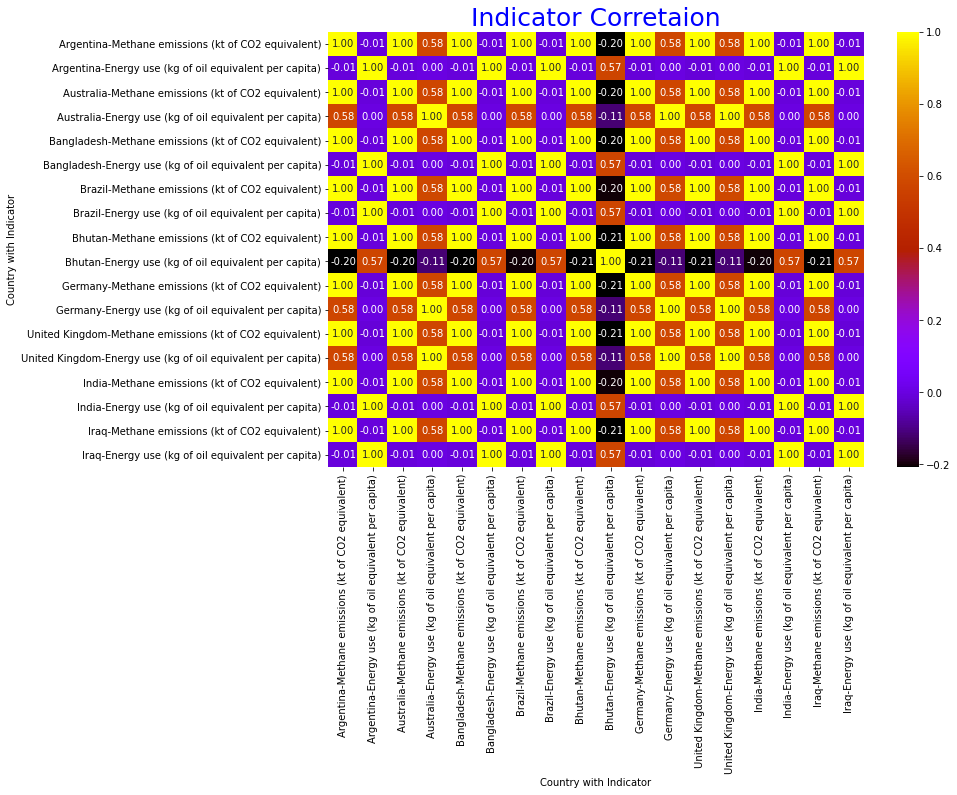

In [17]:
plt.figure(figsize=(12,8))
plt.title("Indicator Corretaion",fontsize=25,color="b")
sns.heatmap(df1.corr(),annot=True,fmt="0.2f",cmap="gnuplot")     # visualize correlation heatmap
plt.show()

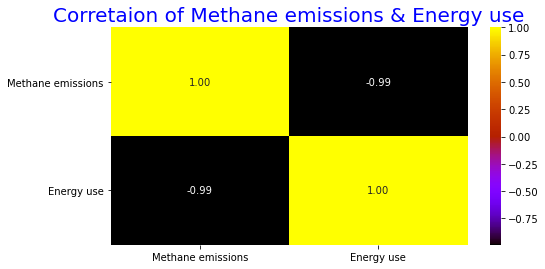

In [18]:
plt.figure(figsize=(8,4))
plt.title("Corretaion of Methane emissions & Energy use",fontsize=20,color="b")
sns.heatmap(st1.iloc[:3,:3].corr(),annot=True,fmt="0.2f",cmap="gnuplot")    # visualizing correlation betwen indicators (overall)
plt.yticks(rotation=0)
plt.show()